In [205]:
#Masterprojekt SFH - 1 Verbraucher, 1 Wärmepumpe, 1 Speicher
import pandas as pd
import pypsaheat as ph
import pypsa

In [206]:
#Einlesen der Lastgänge
df_data = pd.read_csv('when2heat_filtered_2019-12-29-2019-12-31.csv', index_col='utc_timestamp')

df_data_weather = pd.read_csv('weather_data_filtered_2019-12-29-2019-12-31.csv', index_col='utc_timestamp')

In [207]:
df_data

,cet_cest_timestamp,DE_COP_ASHP_floor,DE_COP_ASHP_radiator,DE_COP_ASHP_water,DE_COP_GSHP_floor,DE_COP_GSHP_radiator,DE_COP_GSHP_water,DE_COP_WSHP_floor,DE_COP_WSHP_radiator,DE_COP_WSHP_water,...,DE_heat_demand_water,DE_heat_demand_water_COM,DE_heat_demand_water_MFH,DE_heat_demand_water_SFH,DE_heat_profile_space_COM,DE_heat_profile_space_MFH,DE_heat_profile_space_SFH,DE_heat_profile_water_COM,DE_heat_profile_water_MFH,DE_heat_profile_water_SFH
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2019-12-29T00:00:00Z,2019-12-29T01:00:00+0100,2.92,2.37,2.06,3.81,2.88,2.41,4.65,3.46,2.8,...,NaN,NaN,NaN,NaN,223,161,178,97,71,15
2019-12-29T01:00:00Z,2019-12-29T02:00:00+0100,2.89,2.34,2.05,3.76,2.83,2.39,4.63,3.42,2.8,...,NaN,NaN,NaN,NaN,215,165,184,110,69,12
2019-12-29T02:00:00Z,2019-12-29T03:00:00+0100,2.88,2.32,2.04,3.75,2.81,2.39,4.62,3.41,2.8,...,NaN,NaN,NaN,NaN,227,179,194,152,66,23
2019-12-29T03:00:00Z,2019-12-29T04:00:00+0100,2.87,2.31,2.04,3.74,2.80,2.39,4.62,3.39,2.8,...,NaN,NaN,NaN,NaN,259,213,223,187,106,53
2019-12-29T04:00:00Z,2019-12-29T05:00:00+0100,2.86,2.30,2.03,3.72,2.78,2.38,4.61,3.38,2.8,...,NaN,NaN,NaN,NaN,328,317,286,200,144,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31T19:00:00Z,2019-12-31T20:00:00+0100,3.26,2.76,2.23,4.16,3.30,2.50,4.90,3.86,2.8,...,NaN,NaN,NaN,NaN,256,267,283,106,138,147
2019-12-31T20:00:00Z,2019-12-31T21:00:00+0100,3.23,2.72,2.21,4.13,3.26,2.49,4.88,3.82,2.8,...,NaN,NaN,NaN,NaN,240,243,252,98,134,126
2019-12-31T21:00:00Z,2019-12-31T22:00:00+0100,3.20,2.69,2.20,4.11,3.23,2.49,4.86,3.79,2.8,...,NaN,NaN,NaN,NaN,209,210,188,95,122,73


In [208]:
df_data_weather

,DE_temperature
utc_timestamp,
2019-12-29T00:00:00Z,-2.918
2019-12-29T01:00:00Z,-3.064
2019-12-29T02:00:00Z,-3.186
2019-12-29T03:00:00Z,-3.301
2019-12-29T04:00:00Z,-3.263
...,...
2019-12-31T19:00:00Z,0.767
2019-12-31T20:00:00Z,0.656
2019-12-31T21:00:00Z,0.476


<Axes: xlabel='utc_timestamp'>

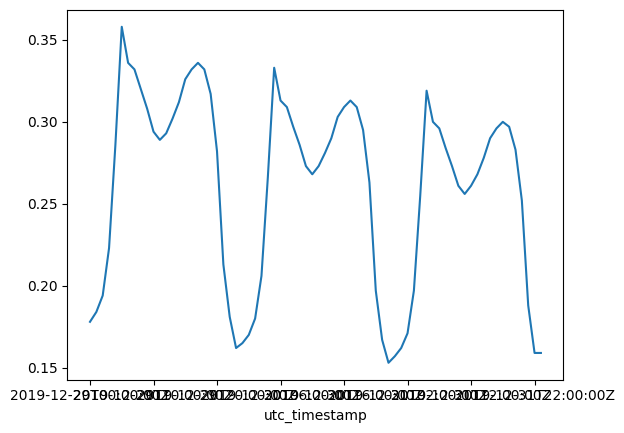

In [209]:
#Zuordnung der Daten aus den Lastgängen
raumwaerme = df_data['DE_heat_profile_space_SFH']/1000 #Heizlast von SFH in kW
raumwaerme.plot()

<Axes: xlabel='utc_timestamp'>

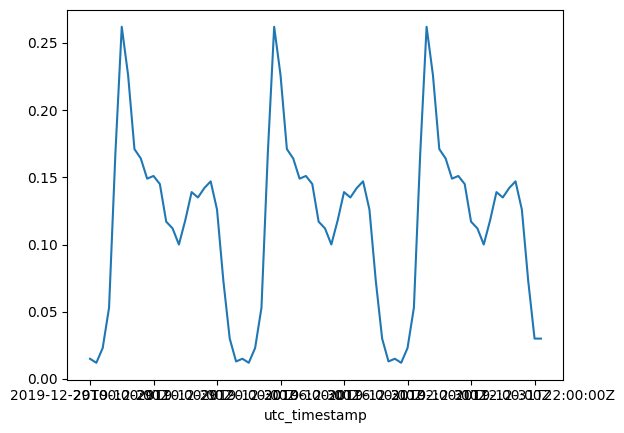

In [210]:
warmwasser = df_data['DE_heat_profile_water_SFH']/1000 #Warmwasserlast von SFH in kW
warmwasser.plot()


<Axes: xlabel='utc_timestamp'>

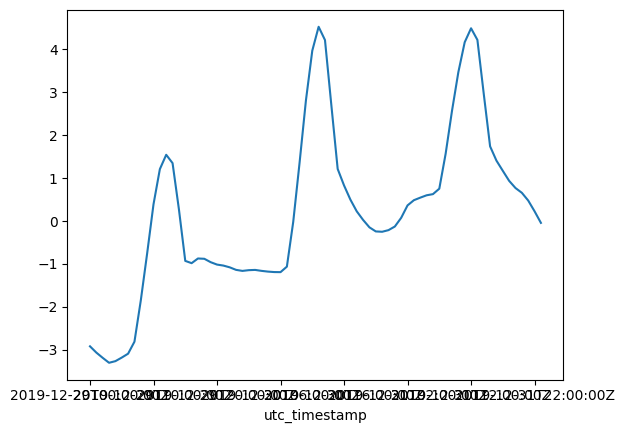

In [211]:
aussentemperatur = df_data_weather['DE_temperature']
aussentemperatur.plot()

<Axes: xlabel='utc_timestamp'>

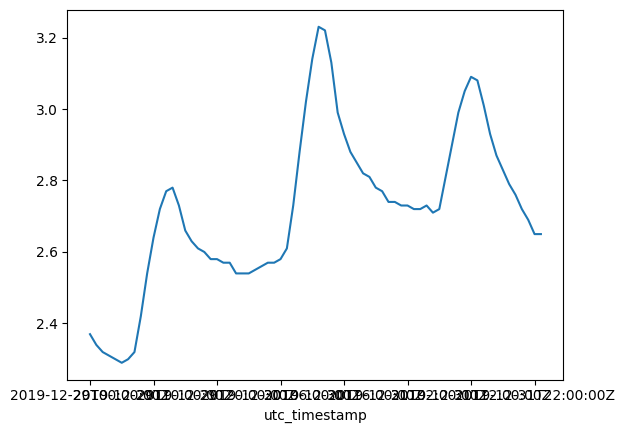

In [212]:
cop_hp = df_data ['DE_COP_ASHP_radiator']
cop_hp.plot()


<Axes: xlabel='utc_timestamp'>

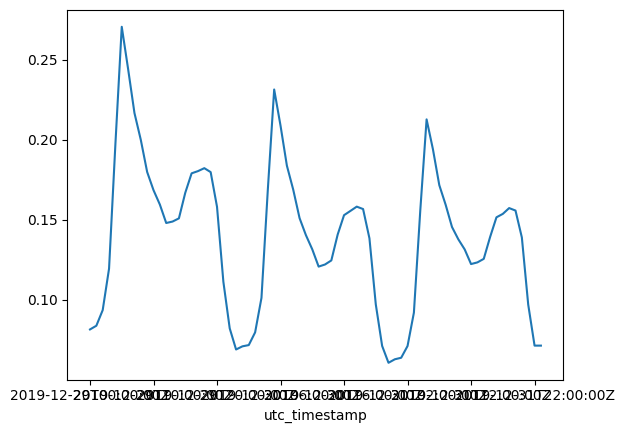

In [197]:
power_demand_hp = (raumwaerme + warmwasser) / cop_hp 
power_demand_hp.plot()

In [198]:
#Strom
grid_cost = 0.35 # €/kWh Kosten für Netzstrombezug
grid_power = 50 #kW Hausanschluss Leistung

In [199]:
#Wärmespeicher eigenschaften 
#wie konstanter Volumenspeicher)
Store_height = 1.5 #m
Store_base = 0.6 #m²
Store_layer = 3
Store_T_layers = [55, 50] #°C Temperaturschichten
Store_T_return = 45 #°C Rücklauftemperatur

T_Warmwasser = 55

In [200]:
#Wärmepumpen eigenschaften
HP_power = 12 #kW Wärmepumpenleistung


<Axes: xlabel='utc_timestamp'>

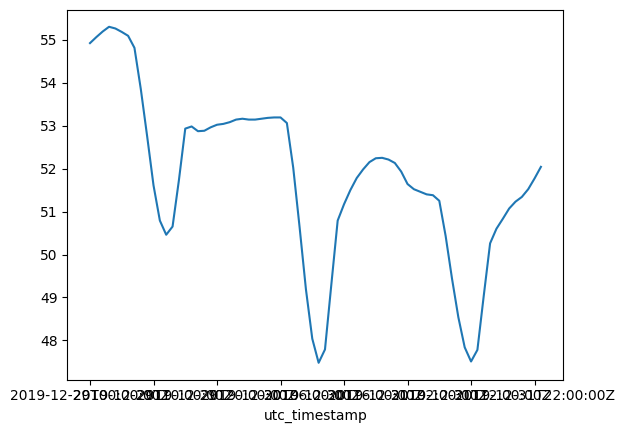

In [201]:
# Vorlauftemperatur für Heizsystem
T_at_0 = 52  #°C Vorlauftemperatur bei Außentemperatur 0°C
T_gradient = 1  #°C/°C Steigung der Heizkurve

T_flow = ph.physics.flow_temperature(T_at_0, T_gradient, aussentemperatur)
T_flow.plot()

In [ ]:
# Aufbau des Modells
n = ph.HeatNetwork()

n.set_snapshots(df_data.index)

n.add("Bus",  
      name = "electricity"      
)

n.add('Generator',
      bus = 'electricity',
      name = 'grid',
      p_nom = grid_power,
      marginal_cost = grid_cost
  )

n.add('Load', 
      bus = 'electricity', 
      name = 'Elektrische Last',
      p_set = power_demand_hp
)

#Hinzufügen eines Schichtspeichers mit konstanten Volumschichten
n.add('HeatStore',
      name = 'hs',
      constant = 'volume',
      height = Store_height, # Höhe in m
      base = Store_base, # Grundfläche in m² 
      T_max = 65, #maximale Speichertemperatur
      cyclic = True
      )

#Hinzufügen einer Wärmepumpe an den Wärmespeicher
n.add('HeatPump',
      name = 'hp',
      bus0 = 'electricity',
      p_nom = HP_power, # thermische Nennleistung in kW
      heat_store = 'hs',
      T_source = df_data_weather['DE_temperature'],
      T_max = 65,
      heat_source  = 'air'
      )

#Hinzufügen der Raumwärmelast
n.add('HeatLoad',
      name = 'heat_space_demand',
      heat_store = 'hs',
      p_set = df_data['DE_heat_profile_space_SFH']/1000,
      T_demand = T_flow
      )

#Hinzufügen der Warmwasserlast
n.add('HeatLoad',
      name = 'heat_water_demand',
      heat_store = 'hs',
      p_set = df_data['DE_heat_profile_water_SFH']/1000,
      T_demand = T_Warmwasser
      )


c:\Users\Robin Remmers\Desktop\projekte\.venv\Lib\site-packages\pypsa\components.py:836: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([cls_df, obj_df], sort=False)
c:\Users\Robin Remmers\Desktop\projekte\.venv\Lib\site-packages\pypsa\components.py:836: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([cls_df, obj_df], sort=False)
c:\Users\Robin Remmers\Desktop\projekte\.venv\Lib\site-packages\pypsa\components.py:836: FutureWarning: The behavior of DataFrame co

<Axes: xlabel='utc_timestamp'>

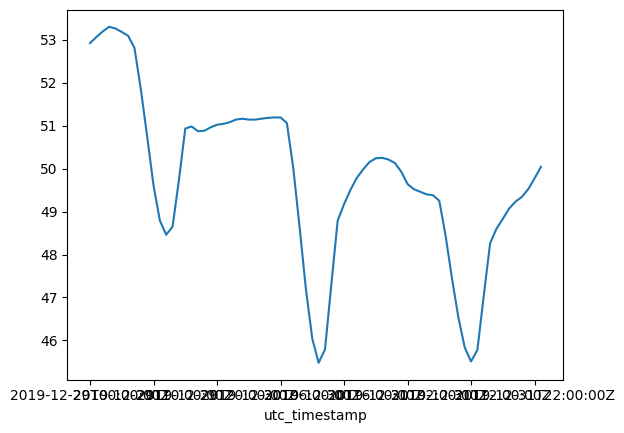

In [203]:
ph.physics.flow_temperature(50, 1, aussentemperatur).plot()

In [214]:
n.optimize(solver_name = 'gurobi')

Index(['electricity'], dtype='object', name='Bus')


KeyError: 0

In [ ]:
ph.plot.plot_stratified_heat_store(n, 'hs', sns=n.snapshots)

KeyError: 'V_layer'